# Importations

In [1]:
import pandas as pd
import pickle as pk
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,precision_score,recall_score,f1_score,precision_recall_curve
from imblearn.over_sampling import SMOTE


# Préparation des données

#### Importation

In [2]:
data_prof = pd.read_csv('Data_Arbre.csv')

In [7]:
len(data_prof[data_prof["fk_arb_etat"] == "EN PLACE"])

6645

In [209]:
cols = data_prof.columns
# cols

Liste des différentes colonnes par type

In [210]:
categorielle = ["clc_quartier","clc_secteur","fk_stadedev","fk_port","fk_pied","fk_situation","fk_nomtech","villeca","feuillage"]
# numerique = ["longitude","latitude","haut_tot","haut_tronc","tronc_diam","age_estim","fk_prec_estim","clc_nbr_diag"]
numerique = ["haut_tot","haut_tronc","tronc_diam","age_estim","fk_prec_estim","clc_nbr_diag"]
binaire = ["fk_arb_etat","remarquable"]
revet = ["fk_revetement"]
# len(categorielle)+len(numerique)+len(binaire)

In [211]:
data_num = data_prof[numerique]

#### Traitement valeur numerique -> StandardScaler

Scaler pour mettre toute les données numérique sur la même echelle

In [212]:
scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data_num)

In [213]:
# data_num_scaled = pd.DataFrame(data_num_scaled,columns=numerique)
data_num_scaled = pd.DataFrame(data_num_scaled,columns=numerique)

In [214]:
data_num_scaled

,haut_tot,haut_tronc,tronc_diam,age_estim,fk_prec_estim,clc_nbr_diag
0,-0.920963,-0.46555,-1.148795,-0.968413,-0.687534,-0.279804
1,0.213100,-1.02441,0.934743,0.822235,0.357548,-0.279804
2,0.051091,0.09331,0.189412,-0.200993,0.357548,-0.279804
3,0.699128,0.09331,0.765349,0.822235,-1.314583,-0.279804
4,-1.082973,-0.46555,1.104136,0.310621,-1.314583,-0.279804
...,...,...,...,...,...,...
7404,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804
7405,-1.406991,-0.46555,-1.521460,-1.582349,-1.523599,-0.279804
7406,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804
7407,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804


#### Valeur catégorielle -> OneHotEncoder

OneHotEncoder pour faire une colonne pour chaque elements different des valeur catégorielle. Exemple, 1 colonne par quartier

In [215]:
hot = OneHotEncoder(sparse_output=False)
hot_df = pd.DataFrame(hot.fit_transform(data_prof[categorielle]), columns=hot.get_feature_names_out(categorielle))

In [216]:
hot_df

,clc_quartier_HARLY,clc_quartier_OMISSY,clc_quartier_Quartier Remicourt,clc_quartier_Quartier Saint-Jean,clc_quartier_Quartier Saint-Martin - Oëstres,clc_quartier_Quartier de Neuville,clc_quartier_Quartier de l'Europe,clc_quartier_Quartier du Centre-Ville,clc_quartier_Quartier du Vermandois,clc_quartier_Quartier du faubourg d'Isle,...,fk_nomtech_TILTOM,fk_nomtech_ULMJAP,fk_nomtech_ULMMIN,fk_nomtech_ULMRES,fk_nomtech_ULMRESreb,fk_nomtech_ULMRESsap,villeca_CASQ,villeca_VILLE,feuillage_Conifère,feuillage_Feuillu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7406,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Données booléen -> passage manuel à 0 ou 1 en fct des besoins

Passage des booléen à 0 ou 1

In [217]:
data_bin = data_prof[binaire]

#Essouche ou non
data_bin.loc[data_bin["fk_arb_etat"] == "Essouché", "fk_arb_etat"] = 1
data_bin.loc[data_bin["fk_arb_etat"] != 1, "fk_arb_etat"] = 0
data_bin.fk_arb_etat = data_bin.fk_arb_etat.astype(int)
# data_bin.fk_arb_etat.value_counts()


#Remarquable ou non
data_bin.loc[data_bin["remarquable"] == "Oui", "remarquable"] = 1
data_bin.loc[data_bin["remarquable"] != 1, "remarquable"] = 0
data_bin.remarquable = data_bin.remarquable.astype(int)

C:\Users\thile\AppData\Local\Temp\ipykernel_22260\2158143917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bin.loc[data_bin["fk_arb_etat"] == "Essouché", "fk_arb_etat"] = 1
C:\Users\thile\AppData\Local\Temp\ipykernel_22260\2158143917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bin.loc[data_bin["fk_arb_etat"] != 1, "fk_arb_etat"] = 0
C:\Users\thile\AppData\Local\Temp\ipykernel_22260\2158143917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [218]:
data_bin

,fk_arb_etat,remarquable
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
7404,0,0
7405,0,0
7406,0,0
7407,0,0


Rassemblement des données

In [219]:
data = pd.concat([data_num_scaled, hot_df, data_bin], axis=1)

In [220]:
data

,haut_tot,haut_tronc,tronc_diam,age_estim,fk_prec_estim,clc_nbr_diag,clc_quartier_HARLY,clc_quartier_OMISSY,clc_quartier_Quartier Remicourt,clc_quartier_Quartier Saint-Jean,...,fk_nomtech_ULMMIN,fk_nomtech_ULMRES,fk_nomtech_ULMRESreb,fk_nomtech_ULMRESsap,villeca_CASQ,villeca_VILLE,feuillage_Conifère,feuillage_Feuillu,fk_arb_etat,remarquable
0,-0.920963,-0.46555,-1.148795,-0.968413,-0.687534,-0.279804,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
1,0.213100,-1.02441,0.934743,0.822235,0.357548,-0.279804,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
2,0.051091,0.09331,0.189412,-0.200993,0.357548,-0.279804,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
3,0.699128,0.09331,0.765349,0.822235,-1.314583,-0.279804,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
4,-1.082973,-0.46555,1.104136,0.310621,-1.314583,-0.279804,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
7405,-1.406991,-0.46555,-1.521460,-1.582349,-1.523599,-0.279804,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
7406,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
7407,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0


#### Division en base de train et test

In [221]:
X_data = data.drop("fk_arb_etat",axis=1)
X_data.columns = X_data.columns.astype(str)
Y_data = data["fk_arb_etat"]
# print(X_data)
# print(Y_data)

In [222]:
X_train_1, X_test, Y_train_1, Y_test = train_test_split(X_data,Y_data,test_size=0.2,random_state=42)

Smote pour remettre à niveau la minorité dans la base de train

In [223]:
#Smote ?
sm = SMOTE(random_state=42, n_jobs=-1, sampling_strategy=0.25)
# sm = SMOTE(random_state=42, n_jobs=-1)
X_train, Y_train = sm.fit_resample(X_train_1, Y_train_1)

C:\Users\thile\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


# Création du modèle -> RandomForestClassifier

#### Premier modèle avec toutes les features

In [224]:
forest = RandomForestClassifier(n_estimators=250,random_state=42)
forest.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=250, random_state=42)

##### Test

In [225]:
# pred = cross_val_score(forest,X_train,Y_train,cv=5,n_jobs=-1)
# pred.mean()

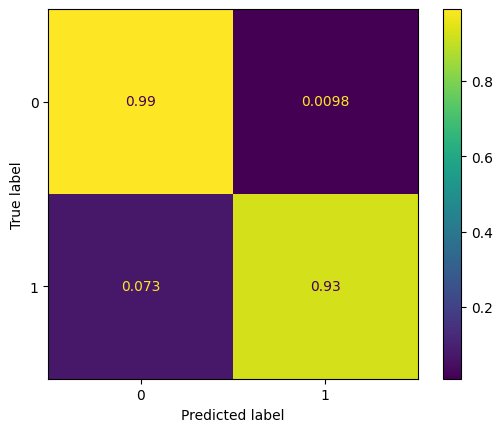

In [226]:
pred_val = cross_val_predict(forest,X_train,Y_train,cv=5,n_jobs=-1)

mat  = confusion_matrix(Y_train, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  forest.classes_)
disp.plot()

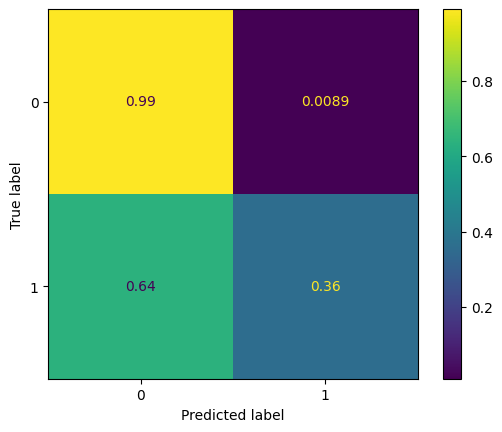

In [227]:
pred_val = forest.predict(X_test)

mat  = confusion_matrix(Y_test, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  forest.classes_)
disp.plot()

#### Feature selection

On récupère les features du modèle pour voir lesquels sont plus importantes que d'autre

In [228]:
feature_names = X_train.columns
# feature_importance_df = pd.DataFrame([])
# feature_importance_df.sort_values(by=0,axis=1,ascending=False,inplace=True)

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': forest.feature_importances_})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
# feature_importance_df
# feature_names

                               Feature  Importance
2                           tronc_diam    0.066356
1                           haut_tronc    0.060400
0                             haut_tot    0.057857
484                  fk_nomtech_SORAUC    0.044560
3                            age_estim    0.042369
..                                 ...         ...
284                  fk_nomtech_ABICON    0.000000
463                  fk_nomtech_QUEMAC    0.000000
255              clc_secteur_rue Hertz    0.000000
211  clc_secteur_Rue des Vieux ménages    0.000000
296               fk_nomtech_ACENEGvar    0.000000

[508 rows x 2 columns]


On récupère les x plus importante pour faire un nouveau modele

In [229]:
top_features = feature_importance_df['Feature'][:30].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


In [230]:
X_train_selected
# X_test_selected

,tronc_diam,haut_tronc,haut_tot,fk_nomtech_SORAUC,age_estim,clc_secteur_Cimetière Sud,fk_situation_Alignement,clc_secteur_Ecole primaire Pierre Laroche,fk_prec_estim,clc_nbr_diag,...,clc_quartier_Quartier Remicourt,clc_secteur_Auberge de jeunesse,clc_secteur_Square des Marronniers,fk_nomtech_BETPEN,fk_nomtech_SALBAB,clc_secteur_Parking Arthur Gibert,fk_nomtech_POPCAN,fk_nomtech_ACEPSE,clc_quartier_Quartier Saint-Martin - Oëstres,clc_secteur_Ecole élémentaire Ernest Lavisse
0,0.087776,-0.465550,0.213100,0.000000,0.054814,0.000000,1.000000,0.0,0.357548,-0.279804,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
1,0.172473,-0.465550,0.213100,0.000000,0.310621,0.000000,0.000000,0.0,0.357548,-0.279804,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.138594,1.211029,0.699128,0.000000,0.822235,0.000000,1.000000,0.0,0.357548,-0.279804,...,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,1.019439,-0.465550,0.375109,0.000000,0.822235,0.000000,1.000000,0.0,1.402630,2.334405,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,-0.420403,0.093310,-0.596945,0.000000,0.310621,0.000000,1.000000,0.0,0.357548,-0.279804,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,0.622314,-1.310732,0.300099,0.000000,0.560118,0.000000,0.000000,0.0,0.357548,-0.279804,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7229,1.660218,5.463335,1.988181,0.000000,2.357076,0.000000,0.000000,0.0,2.447711,2.334405,...,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.347776,0.0,0.0
7230,-1.188539,-0.465550,-0.888906,0.950531,-0.930450,1.000000,0.950531,0.0,0.357548,-0.279804,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7231,-1.148850,-0.242370,-0.856265,0.600651,-0.764101,0.600651,1.000000,0.0,0.357548,-0.279804,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


#### Featured model

Nouveau modèle avec les feature séléctionné

In [231]:
feat_forest = RandomForestClassifier(n_estimators=250,random_state=42,n_jobs=-1)
feat_forest.fit(X_train_selected,Y_train)

RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=42)

##### Test d'accuary et matrice de confusion

Test de validation

In [232]:
pred = cross_val_score(feat_forest,X_train_selected,Y_train,cv=5,n_jobs=-1)
pred.mean()

0.9753937416183242

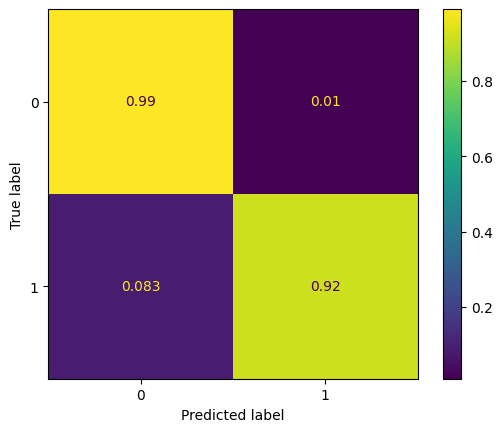

In [233]:
pred_val = cross_val_predict(feat_forest,X_train_selected,Y_train,cv=5,n_jobs=-1)

mat  = confusion_matrix(Y_train, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  feat_forest.classes_)
disp.plot()

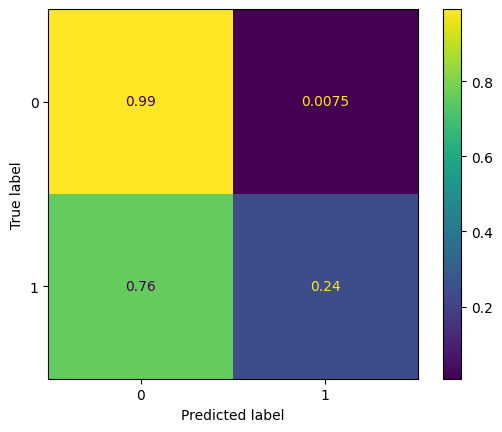

In [234]:
pred_val = feat_forest.predict(X_test_selected)

mat  = confusion_matrix(Y_test, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  feat_forest.classes_)
disp.plot()

##### Hyperparametrage

In [235]:
# print(X_train_selected.shape)
# print(Y_train.shape)

In [236]:
param_grid = { 
    'n_estimators': [i*25 for i in range(1,15)],
    'max_features': ['auto', 'sqrt', 'log2', None],
    # 'max_depth' : [5, 10, 15, None],
    'criterion' :['gini', 'entropy', 'log_loss']
}

In [237]:
# gcv = GridSearchCV(estimator=feat_forest, param_grid=param_grid, cv= 5, n_jobs=-1, scoring='f1')
# gcv.fit(X_train_selected, Y_train)
# gcv.best_params_

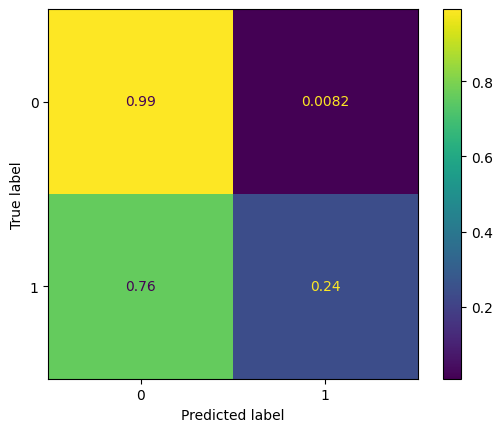

In [238]:
#Test nouveau modele
# grid_model = RandomForestClassifier(random_state=42,n_jobs=-1, **gcv.best_params_)
grid_model = RandomForestClassifier(random_state=42,n_jobs=-1, criterion='entropy', n_estimators=75)
grid_model.fit(X_train_selected,Y_train)



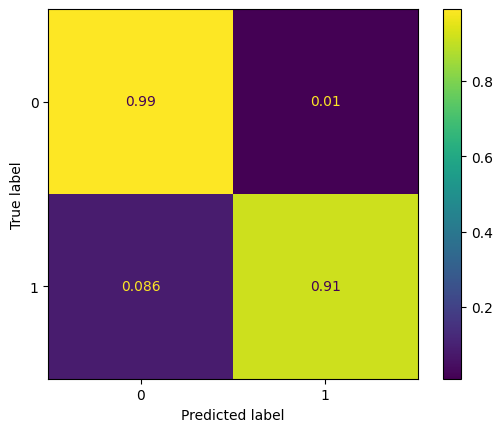

In [241]:
pred_val = cross_val_predict(grid_model,X_train_selected,Y_train,cv=5,n_jobs=-1)

mat  = confusion_matrix(Y_train, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  grid_model.classes_)
disp.plot()

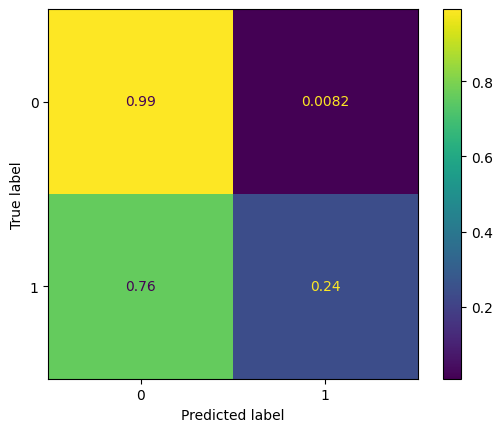

In [242]:
pred_val = grid_model.predict(X_test_selected)

mat  = confusion_matrix(Y_test, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  grid_model.classes_)
disp.plot()

# Pickle

Sauvegarde du modèle, encoder utilisé

In [239]:
dic = {"model":feat_forest,"features":top_features,"scaler":scaler,"hot":hot, "categorielle":categorielle,"numerique":numerique,"binaire":['remarquable']}
pk.dump(dic, open('dic_client_3.pkl', 'wb'))


# categorielle = ["clc_quartier","clc_secteur","fk_stadedev","fk_port","fk_pied","fk_situation","fk_nomtech","villeca","feuillage"]
# numerique = ["longitude","latitude","haut_tot","haut_tronc","tronc_diam","age_estim","fk_prec_estim","clc_nbr_diag"]
# binaire = ["fk_arb_etat","remarquable"]
# revet = ["fk_revetement"]

In [78]:
# pk.dump(smoted_model, open('smoted_model_client_3.pkl', 'wb'))